In [30]:
# *****************************************************
# * Import required packages and set up path for ODYM *
# *****************************************************

import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from core.dataprovider import DataProvider
from core.datachecker import DataChecker
from core.datavisualizer import DataVisualizer
from core.network_graph import NetworkGraph
from core.flowsolver import FlowSolver

# Path configuration
MainPath = os.path.join('.')
sys.path.insert(0, MainPath)
sys.path.insert(0, os.path.join(os.getcwd(), '.', 'lib', 'odym', 'modules'))

# ODYM classes
import ODYM_Classes as msc

# Detect if running inside Jupyter Notebook
%matplotlib inline

In [31]:
# ******************************************************
# * Step 1: Load the data from Excel file DataProvider *
# ******************************************************

# Load data from file using the DataProvider
# and get model parameters from the file
#filename = "data/20241111_test.xlsx"
filename = "data/20241112_test_Hans_IRL.xlsx"

print("Loading data from file {}...".format(filename))
dataprovider = DataProvider(filename)

# Model parameters is a Dictionary that contains loaded data from Excel sheet named "Settings"
# and are used for running the FlowSolver and setting up ODYM
model_params = dataprovider.get_model_params()
print("Using following parameters for running the model:")
for param_name, param_value in model_params.items():
    print("\t{:32}= {}".format(param_name, param_value))

Loading data from file data/20241112_test_Hans_IRL.xlsx...
Using following parameters for running the model:
	sheet_name_processes            = Processes
	column_range_processes          = B:R
	skip_num_rows_processes         = 2
	sheet_name_flows                = Flows
	column_range_flows              = B:U
	skip_num_rows_flows             = 2
	start_year                      = 1961
	end_year                        = 1964
	detect_year_range               = True
	use_virtual_flows               = True
	virtual_flows_epsilon           = 0.1
	conversion_factor_c_to_co2      = 3.67
	fill_missing_absolute_flows     = False
	fill_missing_relative_flows     = False
	fill_method                     = Previous


In [32]:
# **************************************************************
# * Step 2: Check data integrity and build data for FlowSolver *
# **************************************************************

print("Checking errors in data...")
datachecker = DataChecker(dataprovider)
flowsolver_data = datachecker.build_flowsolver_data()
is_checker_ok, checker_messages = datachecker.check_for_errors()
if not is_checker_ok:
    for msg in checker_messages:
        print(msg)
    SystemExit(-1)

# Get the updated years from graph_data
# If using parameter "detect_year_range" DataChecker will automatically adjust
# the starting and ending years and update the used years
years = flowsolver_data["years"]
print("Using year range {} - {}".format(min(years), max(years)))

Checking errors in data...
Checking stock distribution types...
Checking stock distribution parameters...
Checking process total inflows and total outflows mismatches...
Total inflows and total outflows for process 'Industrial_roundwood:IRL' does not match.
Absolute difference of total inflows and total outflows was 42695.072341281295
Check following inflows in Excel sheet 'Flows':
- flow 'Roundwood:IRL Industrial_roundwood:IRL' in row 2
Check following outflows:
- flow 'Industrial_roundwood:IRL Sawnwood_pool:IRL' in row 3

Total inflows and total outflows for process 'Industrial_roundwood:IRL' does not match.
Absolute difference of total inflows and total outflows was 43340.32572834787
Check following inflows in Excel sheet 'Flows':
- flow 'Roundwood:IRL Industrial_roundwood:IRL' in row 4
Check following outflows:
- flow 'Industrial_roundwood:IRL Sawnwood_pool:IRL' in row 5

Total inflows and total outflows for process 'Industrial_roundwood:IRL' does not match.
Absolute difference of 

In [33]:
# *************************************************************
# * Extra step: Process connection graph (network graph)      *
# * This utility helps user to find connection errors in data *
# *************************************************************

# Create network graph for data
show_network_graph = True
if show_network_graph:
    df_process_to_flows = flowsolver_data["df_process_to_flows"]
    network_visualizer = NetworkGraph()
    network_visualizer.build(df_process_to_flows, flowsolver_data["years"])
    network_visualizer.show()

In [34]:
# *******************************************************************
# * Step 3: Solve flows for all timesteps using aiphoria FlowSolver *
# *******************************************************************
print("Solving mass flows for every timestep...")
flowsolver = FlowSolver(data=flowsolver_data)
flowsolver.solve_timesteps()

Solving mass flows for every timestep...
Solving flows for years 1900 - 2015...


Solving 1954/2015: : 54it [00:00, 323.80it/s]

Created 1 virtual processes and 1 virtual flows for year 1900
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1901
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1902
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1903
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1904
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for yea

Solving 1960/2015: : 60it [00:00, 323.80it/s]

Created 1 virtual processes and 1 virtual flows for year 1954
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1955
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1956
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1957
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1958
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for yea

Solving 2012/2015: : 112it [00:00, 312.88it/s]

Created 1 virtual processes and 1 virtual flows for year 1960
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1961
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1962
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1963
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 1964
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for yea

Solving 2015/2015: : 116it [00:00, 318.66it/s]

Created 1 virtual processes and 1 virtual flows for year 2012
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 2013
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 2014
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'

Created 1 virtual processes and 1 virtual flows for year 2015
	- Virtual process ID 'VP_Industrial_roundwood:IRL'
	- Virtual flow ID 'Industrial_roundwood:IRL VP_Industrial_roundwood:IRL'



In [35]:
# ******************************************************
# * Step 4: Setup ODYM classifications and index table *
# ******************************************************

# Get model time start, end, and duration:
model_time_start = int(min(years))
model_time_end = int(max(years))
model_duration = model_time_end - model_time_start
model_elements = ['Solid wood equivalent', 'Carbon']
model_years = years

# Track solid wood equivalent and carbon. Dictionary of classifications enters the index table defined for the system. The index table lists all aspects needed and assigns a classification and index letter to each aspect.
model_classifications = {
    'Time': msc.Classification(Name='Time', Dimension='Time', ID=1, Items=model_years),
    'Cohort': msc.Classification(Name='Age-cohort', Dimension='Time', ID=2, Items=model_years),
    'Element': msc.Classification(Name='Elements', Dimension='Element', ID=3, Items=model_elements),
}

index_table = pd.DataFrame({'Aspect': ['Time', 'Age-cohort', 'Element'],  # 'Time' and 'Element' must be present!
                            'Description': ['Model aspect "time"', 'Model aspect "age-cohort"', 'Model aspect "Element"'],
                            'Dimension': ['Time', 'Time', 'Element'],  # 'Time' and 'Element' are also dimensions
                            'Classification': [model_classifications[Aspect] for Aspect in ['Time', 'Cohort', 'Element']],
                            'IndexLetter': ['t', 'c', 'e' ]})  # Unique one letter (upper or lower case) indices to be used later for calculations.

index_table.set_index('Aspect', inplace=True)  # Default indexing of IndexTable, other indices are produced on the fly
index_table


,Description,Dimension,Classification,IndexLetter
Aspect,,,,
Time,"Model aspect ""time""",Time,<ODYM_Classes.Classification object at 0x00000...,t
Age-cohort,"Model aspect ""age-cohort""",Time,<ODYM_Classes.Classification object at 0x00000...,c
Element,"Model aspect ""Element""",Element,<ODYM_Classes.Classification object at 0x00000...,e


In [36]:
# **************************************
# * Step 5: Initialize ODYM MFA system *
# **************************************

mfa_system = msc.MFAsystem(Name='Wood product system', Geogr_Scope='Europe', Unit='Mm3',
                           ProcessList=[], FlowDict={}, StockDict={}, ParameterDict={},
                           Time_Start=model_time_start, Time_End=model_time_end, IndexTable=index_table,
                           Elements=index_table.loc['Element'].Classification.Items)

# Get inflow values to stock
year_index_to_year = dict(enumerate(years))
unique_processes = flowsolver.get_unique_processes()
unique_flows = flowsolver.get_unique_flows()

# DataFrames for Processes, Flows and Flow values
print("Collecting processes to DataFrame...")
df_processes = flowsolver.get_processes_as_dataframe()
print("Collecting flows to DataFrame...")
df_flows = flowsolver.get_flows_as_dataframe()
print("Collecting evaluated flow values to DataFrame...")
df_flow_values = flowsolver.get_evaluated_flow_values_as_dataframe()

print("Creating ODYM objects...")
# Create ODYM objects

print("Building ODYM processes...")
odym_processes = []
process_id_to_index = {}
for process_id, process in unique_processes.items():
    process_index = len(odym_processes)
    process_id_to_index[process_id] = process_index
    new_process = msc.Process(ID=process_index, Name=process.name)
    odym_processes.append(new_process)

print("Building ODYM flows...")
odym_flows = {}
for flow_id, flow in unique_flows.items():
    source_process_index = process_id_to_index[flow.source_process_id]
    target_process_index = process_id_to_index[flow.target_process_id]
    new_flow = msc.Flow(ID=flow.id, P_Start=source_process_index, P_End=target_process_index, Indices='t,e', Values=None)
    odym_flows[flow.id] = new_flow

print("Building ODYM stocks...")
odym_stocks = {}
for stock in flowsolver.get_all_stocks():
    process_index = process_id_to_index[stock.id]
    new_stock = msc.Stock(ID=stock.id, Name=stock.name, P_Res=process_index, Indices='t,e', Type=0, Values=None)
    odym_stocks[stock.id] = new_stock

mfa_system.ProcessList = odym_processes
mfa_system.FlowDict = odym_flows
mfa_system.StockDict = odym_stocks
mfa_system.Initialize_FlowValues()
mfa_system.Initialize_StockValues()
mfa_system.Consistency_Check()

# Update ODYM flow values from flow values DataFrame
for flow_id, flow in mfa_system.FlowDict.items():
    for year_index, value in enumerate(flow.Values):
        # Skip to next year if FlowSolver does not have data for this year
        # This is possible because ODYM flow and stock values are already initialized to 0.0
        flow_has_data_for_year = flowsolver.has_flow(year=year_index_to_year[year_index], flow_id=flow_id)
        if not flow_has_data_for_year:
            continue

        # NOTE: Virtual flows use default value defined in Flow for carbon content (now 1.0).
        solved_flow = flowsolver.get_flow(year=year_index_to_year[year_index], flow_id=flow_id)
        flow.Values[year_index, 0] = solved_flow.evaluated_value
        flow.Values[year_index, 1] = solved_flow.evaluated_value_carbon


# Process stocks (fill with data)
for stock_id, stock in odym_stocks.items():
    # Calculate cohorts for "Solid wood equivalent"
    dsm_swe = flowsolver.get_dynamic_stocks_swe()[stock_id]
    swe_stock_by_cohort = dsm_swe.compute_s_c_inflow_driven()
    swe_outflow_by_cohort = dsm_swe.compute_o_c_from_s_c()
    swe_stock_total = dsm_swe.compute_stock_total()
    swe_stock_change = dsm_swe.compute_stock_change()
    stock.Values[:, 0] = swe_stock_change

    # Calculate cohorts for "Carbon"
    dsm_carbon = flowsolver.get_dynamic_stocks_carbon()[stock_id]
    carbon_stock_by_cohort = dsm_carbon.compute_s_c_inflow_driven()
    carbon_outflow_by_cohort = dsm_carbon.compute_o_c_from_s_c()
    carbon_stock_total = dsm_carbon.compute_stock_total()
    carbon_stock_change = dsm_carbon.compute_stock_change()
    stock.Values[:, 1] = carbon_stock_change

print("Mass balance difference per year")
mb = mfa_system.MassBalance()
print("Mass balance result shape: {}".format(mb.shape))
df_mass_balance = pd.DataFrame(columns=["Year", "Process 0", "Rest", "Abs difference"])
for year_index, year in enumerate(years):
    # Calculate mass balance using the first element in MFA system (= base element)
    # Negative value in process 0 means that process 0 has no inflows so this mass
    # is coming from outside system boundaries
    p0 = np.sum(mb[year_index][0][0])
    rest = np.sum(mb[year_index][1:,0])
    abs_diff = abs(p0) - abs(rest)
    df_mass_balance.loc[year_index] = np.array([year, p0, rest, abs_diff])
df_mass_balance = df_mass_balance.astype({"Year": "int32"})
df_mass_balance.set_index(["Year"], inplace=True)
print(df_mass_balance)

Creating ODYM objects...
Building ODYM processes...
Building ODYM flows...
Building ODYM stocks...
Mass balance difference per year
Mass balance result shape: (116, 4, 2)
         Process 0          Rest  Abs difference
Year                                            
1900 -6.191987e+04  6.191987e+04    0.000000e+00
1901 -6.285567e+04  6.285567e+04    0.000000e+00
1902 -6.380561e+04  6.380561e+04    0.000000e+00
1903 -6.476991e+04  6.476991e+04   -7.275958e-12
1904 -6.574878e+04  6.574878e+04    0.000000e+00
...            ...           ...             ...
2011 -1.545718e+06  1.545718e+06    0.000000e+00
2012 -1.550965e+06  1.550965e+06    0.000000e+00
2013 -1.624164e+06  1.624164e+06    0.000000e+00
2014 -1.740096e+06  1.740096e+06    0.000000e+00
2015 -1.811331e+06  1.811331e+06    0.000000e+00

[116 rows x 3 columns]


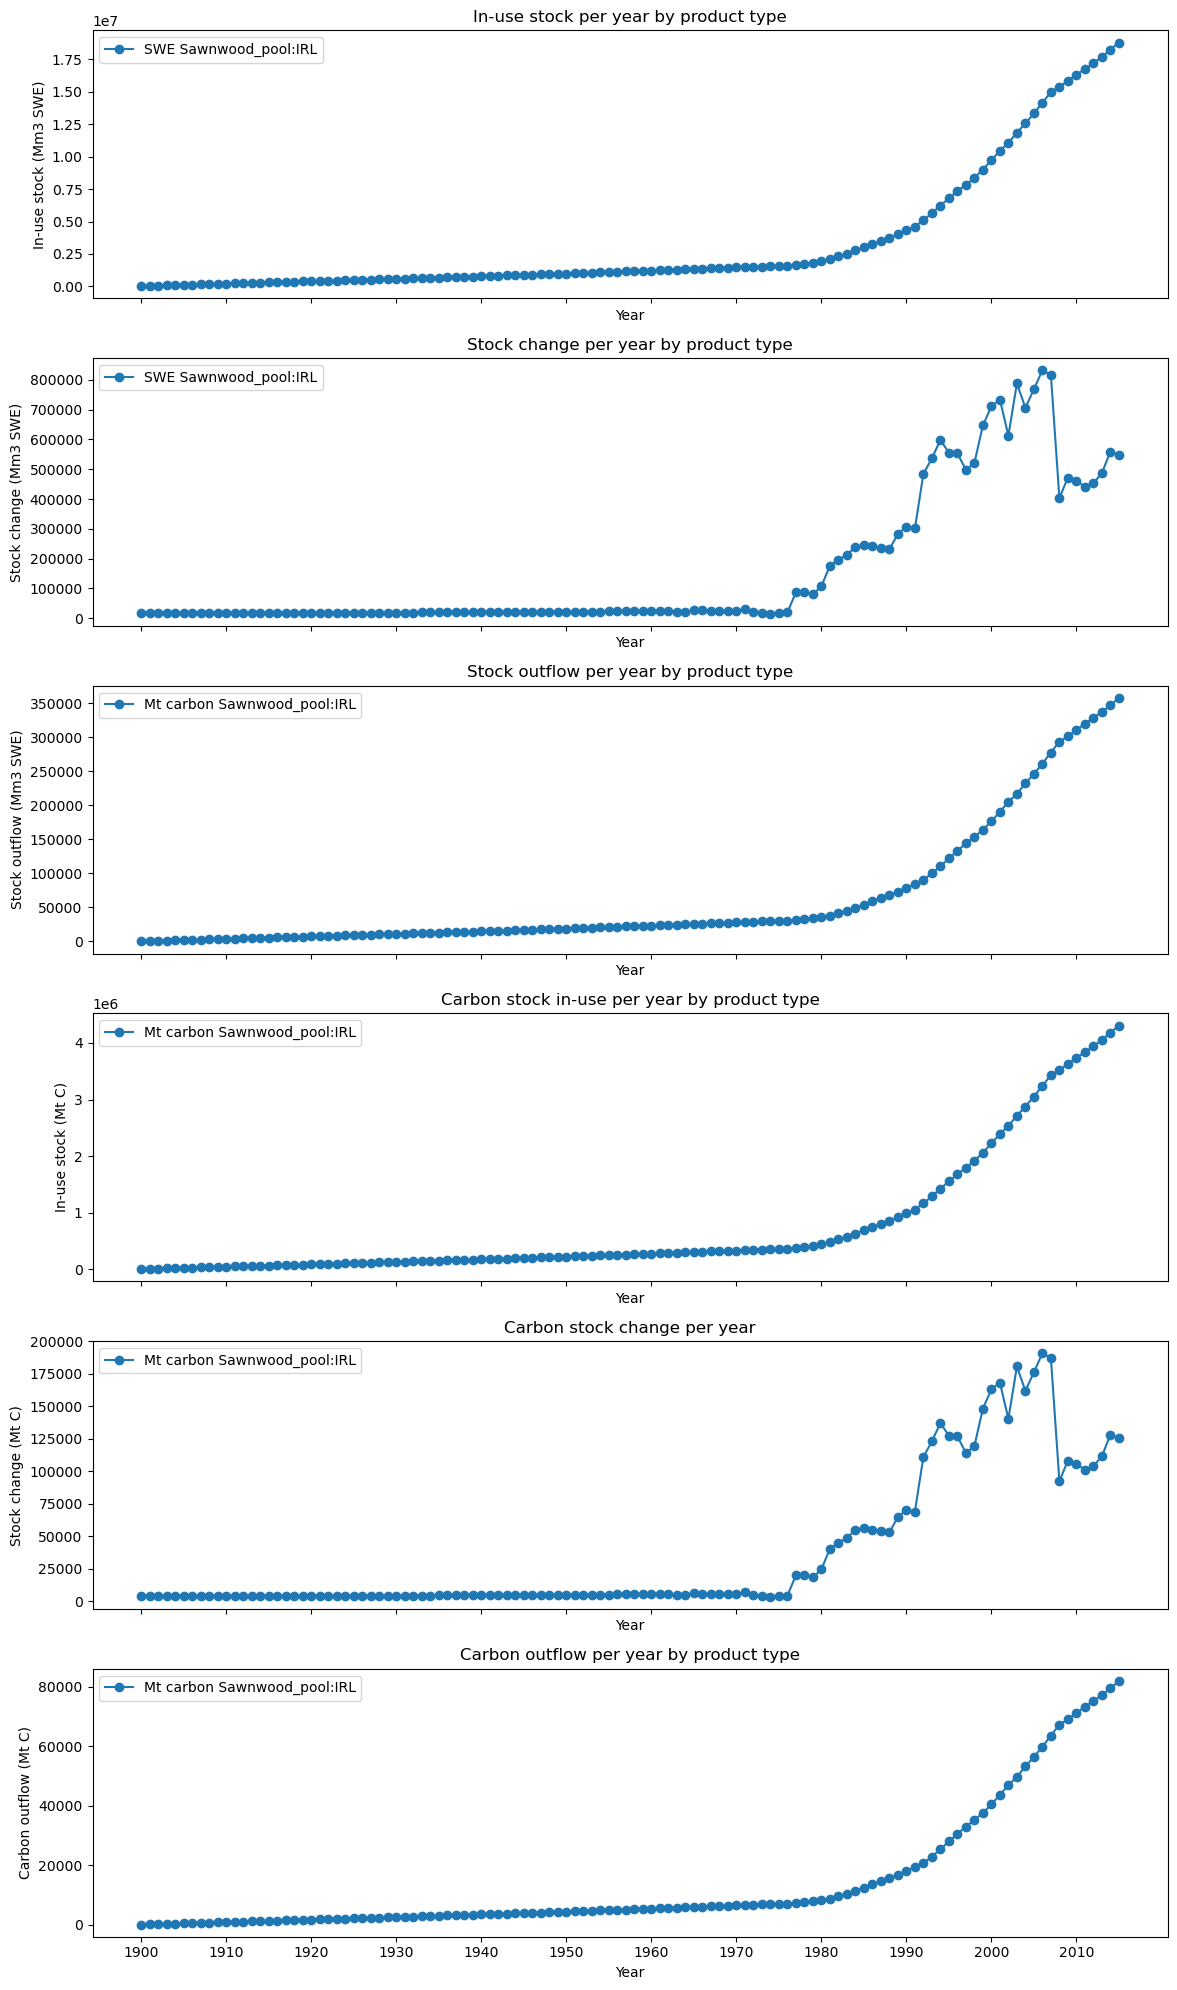

In [37]:
# *****************************************************
# * Step 6: Plot the dynamic stocks results *
# *****************************************************

# stock_id_to_dsm_swe and stock_id_to_dsm_carbon are dictionaries containing DynamicStockModel instances
stock_id_to_dsm_swe = flowsolver.get_dynamic_stocks_swe()
stock_id_to_dsm_carbon = flowsolver.get_dynamic_stocks_carbon()
if len(stock_id_to_dsm_swe.keys()):
    fig, axes = plt.subplots(6, 1, sharex='all', sharey='none', figsize=(12, 20))

    for stock_id in stock_id_to_dsm_swe.keys():
        # SWE Stock
        dsm_swe = stock_id_to_dsm_swe[stock_id]
        swe_stock_by_cohort = dsm_swe.compute_s_c_inflow_driven()
        swe_oc = dsm_swe.compute_o_c_from_s_c()
        swe_stock_total = dsm_swe.compute_stock_total()
        swe_stock_change = dsm_swe.compute_stock_change()
        swe_o = dsm_swe.compute_outflow_total()

        # Carbon stock
        dsm_carbon = stock_id_to_dsm_carbon[stock_id]
        carbon_stock_by_cohort = dsm_carbon.compute_s_c_inflow_driven()
        carbon_oc = dsm_carbon.compute_o_c_from_s_c()
        carbon_stock_total = dsm_carbon.compute_stock_total()
        carbon_stock_change = dsm_carbon.compute_stock_change()
        carbon_o = dsm_carbon.compute_outflow_total()

        # Plot SWE stock total (in-use stocks)
        axes[0].plot(years, swe_stock_total, marker='o', label=f'SWE {stock_id}')
        axes[0].set_ylabel("In-use stock (Mm3 SWE)")
        axes[0].set_title("In-use stock per year by product type")

        # Plot SWE stock change
        axes[1].plot(years, swe_stock_change, marker='o', label=f'SWE {stock_id}')
        axes[1].set_ylabel("Stock change (Mm3 SWE)")
        axes[1].set_title("Stock change per year by product type")

        # Plot SWE outflow by cohort
        axes[2].plot(years, swe_o, marker='o', label=f'Mt carbon {stock_id}')
        axes[2].set_ylabel("Stock outflow (Mm3 SWE)")
        axes[2].set_title("Stock outflow per year by product type")

        # Plot Carbon stock total (in-use stocks)
        axes[3].plot(years, carbon_stock_total, marker='o', label=f'Mt carbon {stock_id}')
        axes[3].set_ylabel("In-use stock (Mt C)")
        axes[3].set_title("Carbon stock in-use per year by product type")

        # Plot Carbon stock change
        axes[4].plot(years, carbon_stock_change, marker='o', label=f'Mt carbon {stock_id}')
        axes[4].set_ylabel("Stock change (Mt C)")
        axes[4].set_title("Carbon stock change per year")

        # Plot carbon outflow by cohort
        axes[5].plot(years, carbon_o, marker='o', label=f'Mt carbon {stock_id}')
        axes[5].set_ylabel("Carbon outflow (Mt C)")
        axes[5].set_title("Carbon outflow per year by product type")

    # Set common properties to axes
    range_x_ticks = range(min(years), max(years) + 1)
    for axis in axes:
        axis.set_xlabel("Year")
        axis.title.set_size(12)
        axis.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    tick_gap = 1 if len(years) < 15 else 10
    plt.xticks(years[::tick_gap])

    # Save the figure as an SVG file
    svg_file_path = "data/stock_plots_by_product.svg"
    plt.savefig(svg_file_path, format='svg')

    plt.show()
else:
    print("No dynamic stocks in the defined system")

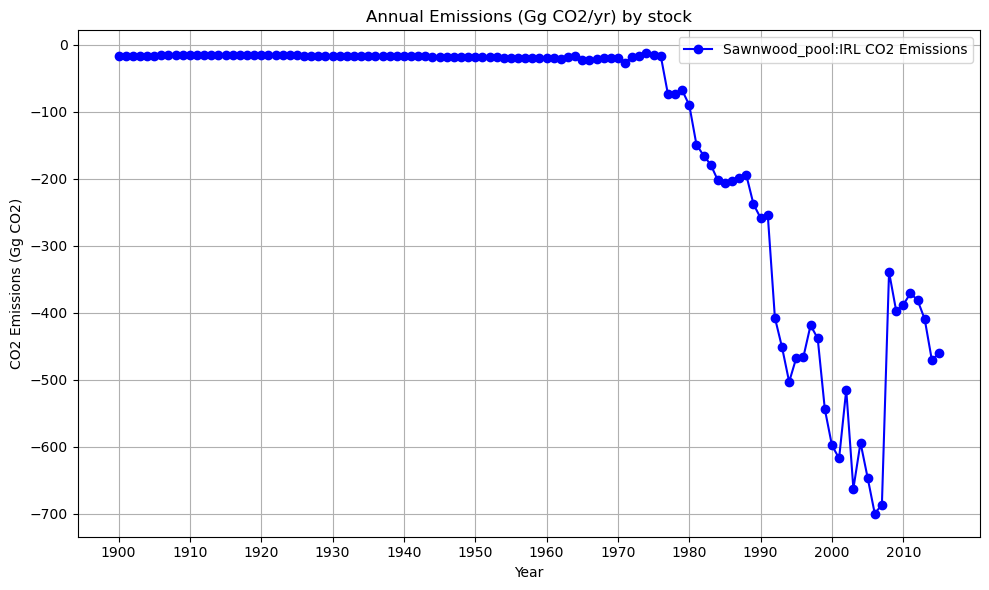

Annual Emissions (Gg CO2/yr) by stock:

      Sawnwood_pool:IRL
Year                   
1900         -16.157097
1901         -16.084485
1902         -16.016986
1903         -15.954558
1904         -15.897156
...                 ...
2011        -370.740028
2012        -380.984571
2013        -409.465601
2014        -470.324650
2015        -459.973358

[116 rows x 1 columns]


In [38]:
# *****************************************************
# * Step 7: Convert the carbon stocks to CO2 removals *
# *****************************************************
years = flowsolver_data["years"]
year_start = min(years)

# Calculate CO2 removals for each stock and plot the results
stock_id_to_dsm_carbon = flowsolver.get_dynamic_stocks_carbon()
if len(stock_id_to_dsm_carbon.keys()):
    results_co2_removals = pd.DataFrame({'Year': years})
    conversion_factor_c_to_co2 = model_params["conversion_factor_c_to_co2"]

    # Define line styles, markers, and colors for differentiation
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    plt.figure(figsize=(10, 6))
    for index, (stock_id, dsm_carbon) in enumerate(stock_id_to_dsm_carbon.items()):
        total_inflows_carbon = dsm_carbon.i
        total_outflows_carbon = dsm_carbon.o
        annual_co2_removal = - (total_inflows_carbon - total_outflows_carbon) * conversion_factor_c_to_co2 / 1000
        results_co2_removals[stock_id] = annual_co2_removal

        line_style = line_styles[index % len(line_styles)]
        marker = markers[index % len(markers)]
        color = colors[index % len(colors)]
        plt.plot(years, results_co2_removals[stock_id], marker=marker, linestyle=line_style, color=color, label=f'{stock_id} CO2 Emissions')

    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Gg CO2)')
    plt.title('Annual Emissions (Gg CO2/yr) by stock')
    plt.grid(True)
    tick_gap = 1 if len(years) < 15 else 10
    plt.xticks(years[::tick_gap])
    plt.legend()
    plt.tight_layout()

    # Save the figure as an SVG file
    svg_file_path = "data/annual_emissions_by_stock.svg"
    plt.savefig(svg_file_path, format='svg')
    plt.show()

    print("Annual Emissions (Gg CO2/yr) by stock:\n")
    results_co2_removals.set_index("Year", inplace=True)
    print(results_co2_removals)
else:
    print("No dynamic stocks in the defined system")

In [39]:
# ************************************************************
# * Step 8: Visualize inflows per year to selected processes *
# ************************************************************

# Visualize inflows per year to processes
process_ids_to_visualize = ["Incineration:FI", "Sawmilling:FI"]
for process_id in process_ids_to_visualize:
    # Ignore visualizing inflows for processes that do not exist in this graph
    if process_id not in unique_processes:
        continue

    flow_id_to_source_process_id = {}
    source_process_names = []

    # Find all source processes of all incoming flows to this process in all years
    # This is needed to create stable set of process names so that the relative
    # position of the processes stay the same in stacked chart between the years
    source_process_ids = set()
    for year in years:
        inflows = flowsolver.get_process_flows(process_id, year)["Inflows"]
        unique_flow_ids = set()
        for flow in inflows:
            unique_flow_ids.add(flow.id)
            flow_id_to_source_process_id[flow.id] = flow.source_process_id

        # Find source process ID of each incoming flow and add
        # to list of unique source process IDs if not already there
        unique_flow_ids = list(unique_flow_ids)
        for flow_id in unique_flow_ids:
            source_process_ids.add(flow_id_to_source_process_id[flow_id])

    # Now source_process_ids-list contains list of all the possible process IDs
    # that have flows incoming to process_id. This list is needed to keep the
    # incoming process IDs the same every year because aiphoria allows the connections
    # between the flows to change between the years.
    source_process_ids = list(source_process_ids)

    # Create 2D array with shape of (number of source process IDs, number of years)
    # and fill with the value of the inflow from source process for each year
    source_process_by_flow_values = np.ndarray(shape=(len(source_process_ids), len(years)))
    for year_index, year in enumerate(years):
        inflows = flowsolver.get_process_flows(process_id, year)["Inflows"]
        for flow in inflows:
            source_process_id_index = source_process_ids.index(flow.source_process_id)
            source_process_by_flow_values[source_process_id_index, year_index] = flow.evaluated_value
            print(f"Source process ID: {flow.source_process_id}, Input value: {flow.evaluated_value}, Year: {year}")

    # Get the process name for the currently visualized process
    process = flowsolver.get_process(process_id, min(years))

    # Initialize the figure and axes for the stacked area chart
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.stackplot(years, source_process_by_flow_values, labels=list(source_process_ids))
    ax.set_ylabel("Mm3 SWE")
    ax.set_title("Inputs to {}".format(process.name))
    ax.legend(loc='upper left')
    tick_gap = 1 if len(years) < 15 else 10
    plt.xticks(years[::tick_gap])

    # Save the figure as an SVG file
    svg_file_path = "data/inflows_to_processes_{}.svg".format(process.name)
    plt.savefig(svg_file_path, format='svg')
    plt.show()

In [40]:
# *****************************************************
# * Step 9: Visualize the flow graph as Sankey graph *
# *****************************************************

# Color mappings
process_transformation_stage_colors = dict()
process_transformation_stage_colors["Source"] = "#7DDA60"
process_transformation_stage_colors["First"] = "#eb5e34"
process_transformation_stage_colors["Second"] = "#8c76cf"
process_transformation_stage_colors["Third"] = "#5BAA11"
process_transformation_stage_colors["VAM"] = "#3281db"
process_transformation_stage_colors["RoW"] = "#61b053"  # Rest of the world
process_transformation_stage_colors["EoL"] = "#EFC3CA"  # Brown
process_transformation_stage_colors["by_prod"] = "#DFC57B"  # gold
process_transformation_stage_colors["Virtual"] = "#707070"
process_transformation_stage_colors["Other"] = "#707070"


# Label overrides
virtual_process_graph_labels = dict()
virtual_process_graph_labels["VP_P2:EU"] = "Unreported flow from P2"
virtual_process_graph_labels["VP_P3:EU"] = "Unreported flow from P3"

# Virtual Process and virtual Flow colors
visualizer_params = {
    # User can hide processes in Sankey graph that have total inflows less than this value
    # This value cannot be changed now in the Sankey graph
    "small_node_threshold": 5,

    # Dictionary to define labels for virtual flows
    # If dictionary contains label for the virtual process then that is used,
    # otherwise the virtual process ID is used
    "virtual_process_graph_labels": virtual_process_graph_labels,

    # Dictionary to define color of process by the process transformation stage name
    # All must be provided as a RGB hex string, prefixed by character '#'
    # Usage example: { "Source": "#707070" }
    "process_transformation_stage_colors": process_transformation_stage_colors,

    # How transparent flows are (0.0 = invisible, 1.0 = fully opaque)
    "flow_alpha": 0.75,

    # Color for virtual process
    "virtual_process_color": "rgba(0.3, 0.3, 0.3, 0.6)",
    #"virtual_process_color": "#707070",

    # Color for virtual flows
    #"virtual_flow_color": "rgba(0.5, 0.5, 0.5, 0.5)",
    "virtual_flow_color": "#808080",
}

visualizer = DataVisualizer()
visualizer.build(flowsolver, visualizer_params)
visualizer.show()